In [ ]:
import pandas as pd
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# TEXT CLEANING:
1. Sample 10000 rows
2. Remove html tags
3. Remove special character, stop words(and, is ,or ,not...)
4. Conversion to lowercase
5. Stemming(similar words like play, playing, played...)

In [ ]:
# df=df.sample(10000)
# df.shape

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)

<ipython-input-61-c405766388b5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
<ipython-input-61-c405766388b5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'].replace({'positive':1,'negative':0},inplace=True)


In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
# Function to clean html tags
import re
def clean_html(text):
    clean=re.compile('<.*?>')    # regular expression used to match HTML tags.
    return re.sub(clean,'',text) # substitute all matched HTML tags with empty strings

In [ ]:
df['review']=df['review'].apply(clean_html)

In [ ]:
# Converting everything to lower
df['review']=df['review'].apply(lambda x:x.lower())

In [ ]:
# Removing special characters
import re
def remove_specialchar(text):
    x=''
    for i in text:
        if i.isalnum():
            x=x+i
        else:
            x=x+' '
    return x


In [ ]:
df['review']=df['review'].apply(remove_specialchar)


In [ ]:
# Remove the stop words
import nltk    # Natural Language Toolkit (nltk)
#  imports the stopwords module from nltk.corpus.
# corpus in NLTK is a collection of text data used for NLP tasks
from nltk.corpus import stopwords


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return [word for word in text.split() if word not in stop_words]

# Apply the function
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df.head()

,review,sentiment
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1
1,"[wonderful, little, production, filming, techn...",1
2,"[thought, wonderful, way, spend, time, hot, su...",1
3,"[basically, family, little, boy, jake, thinks,...",0
4,"[petter, mattei, love, time, money, visually, ...",1


In [ ]:
# Perform Stemming

# This line imports the PorterStemmer class from the nltk.stem.porter module.
# Stemming is the process of reducing words to their base or root form.
# PorterStemmer is a classic stemming algorithm (developed by Martin Porter) used in many NLP applications.

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
y=[]
def stem_words(text):
  for i in text:
    y.append(ps.stem(i))
  z=y[:]
  y.clear()
  return z

In [ ]:
df['review']=df['review'].apply(stem_words)

In [ ]:
# JOIN BACK
def join_back(list_input):
  return " ".join(list_input)

In [ ]:
df['review']=df['review'].apply(join_back)

In [ ]:
pos_reviews=df[df['sentiment']==1]
pos_reviews.head()

,review,sentiment
0,one review mention watch 1 oz episod hook righ...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
4,petter mattei love time money visual stun film...,1
5,probabl time favorit movi stori selfless sacri...,1


In [ ]:
from collections import Counter
count=Counter()
for  text in pos_reviews['review'].values:
  for  word in text.split():
      count[word]+=1

top_words=count.most_common(20)

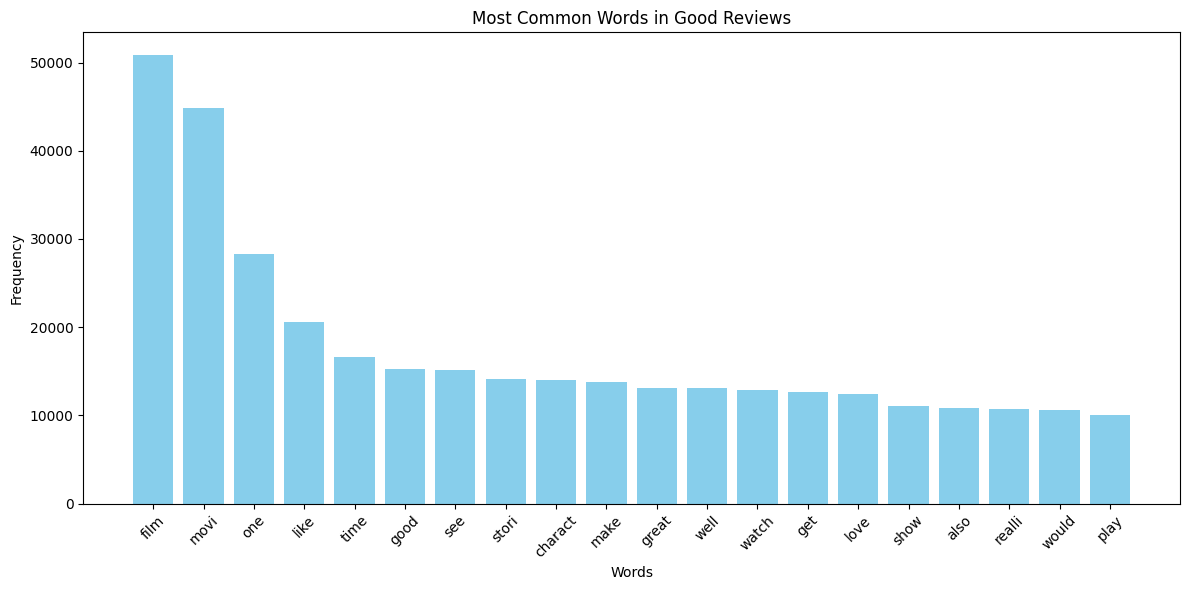

In [ ]:
import matplotlib.pyplot as plt

words, frequencies = zip(*top_words)

# Plotting
plt.figure(figsize=(12,6))
plt.bar(words, frequencies, color='skyblue')
plt.xticks(rotation=45)
plt.title("Most Common Words in Good Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
neg_reviews=df[df['sentiment']==0]
neg_reviews.head()

,review,sentiment
3,basic famili littl boy jake think zombi closet...,0
7,show amaz fresh innov idea 70 first air first ...,0
8,encourag posit comment film look forward watch...,0
10,phil alien one quirki film humour base around ...,0
11,saw movi 12 came recal scariest scene big bird...,0


In [ ]:
from collections import Counter
count=Counter()
for  text in neg_reviews['review'].values:
  for  word in text.split():
      count[word]+=1

top_words=count.most_common(20)

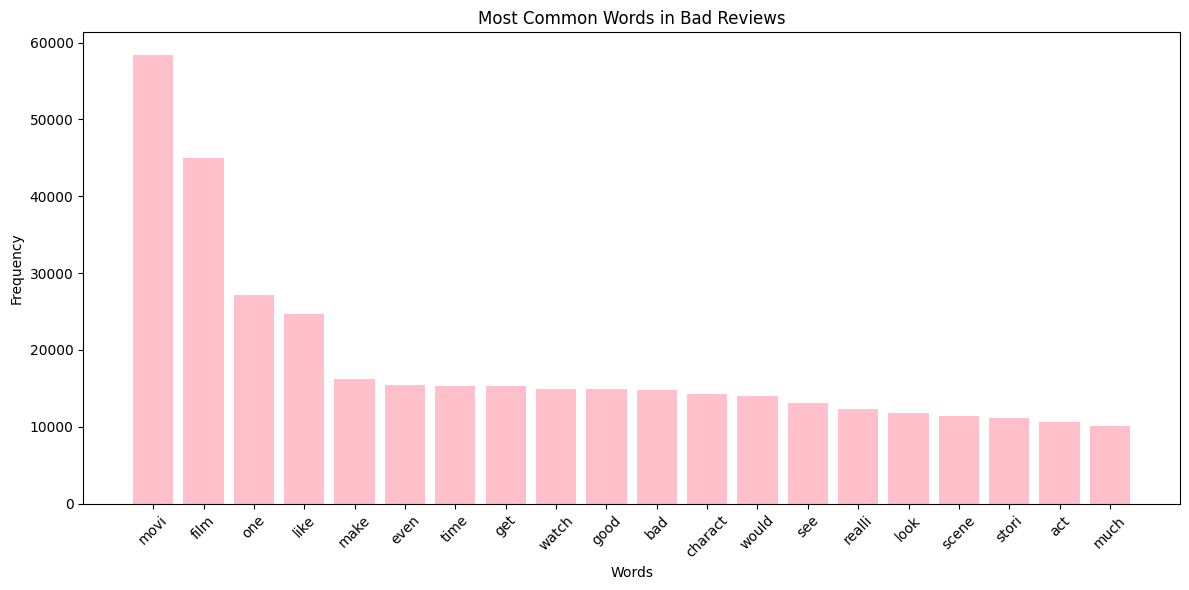

In [ ]:
import matplotlib.pyplot as plt

words, frequencies = zip(*top_words)

# Plotting
plt.figure(figsize=(12,6))
plt.bar(words, frequencies, color='Pink')
plt.xticks(rotation=45)
plt.title("Most Common Words in Bad Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# This imports TfidfVectorizer, which stands for Term Frequency-Inverse Document Frequency Vectorizer.
# TF-IDF = Term Frequency × Inverse Document Frequency
# Helps reduce the importance of commonly occurring words like "the", "is", etc., and gives more importance to rare but informative words.

#cv=CountVectorizer(max_features=500)
tfidf = TfidfVectorizer(max_features=300)
# Only the top 1000 most frequent words are considered. So, if a review contains rare words,
# they might be ignored completely, resulting in all zeros or just one matching word.

In [ ]:
X=tfidf.fit_transform(df['review']).toarray()

In [ ]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.13574786, 0.        ,
        0.16807625],
       ...,
       [0.        , 0.        , 0.2063418 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X.shape

(50000, 300)

In [ ]:
tfidf.get_feature_names_out()

array(['10', 'absolut', 'act', 'action', 'actor', 'actual', 'almost',
       'along', 'also', 'although', 'alway', 'american', 'anim', 'anoth',
       'anyon', 'anyth', 'appear', 'around', 'attempt', 'audienc', 'aw',
       'away', 'back', 'bad', 'beauti', 'becom', 'begin', 'believ',
       'best', 'better', 'big', 'bit', 'black', 'book', 'bore', 'boy',
       'budget', 'call', 'camera', 'care', 'cast', 'chang', 'charact',
       'classic', 'come', 'comedi', 'complet', 'could', 'coupl', 'cours',
       'day', 'dead', 'death', 'definit', 'die', 'differ', 'direct',
       'director', 'disappoint', 'done', 'dvd', 'effect', 'either', 'els',
       'end', 'enjoy', 'enough', 'entertain', 'entir', 'episod', 'especi',
       'even', 'ever', 'everi', 'everyon', 'everyth', 'excel', 'expect',
       'eye', 'face', 'fact', 'fall', 'famili', 'fan', 'far', 'father',
       'featur', 'feel', 'fight', 'film', 'final', 'find', 'first',
       'follow', 'found', 'friend', 'fun', 'funni', 'gener', 'get',

In [ ]:
y=df['sentiment']
y.shape

(50000,)

In [ ]:
y

,sentiment
0,1
1,1
2,1
3,0
4,1
...,...
49995,1
49996,0
49997,0
49998,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)

BernoulliNB()

In [ ]:
y_pred1=clf1.predict(X_test)
y_pred2=clf2.predict(X_test)
y_pred3=clf3.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("GaussianNB: ",accuracy_score(y_test,y_pred1))
print("MultinomialNB: ",accuracy_score(y_test,y_pred2))
print("BernoulliNB: ",accuracy_score(y_test,y_pred3))

GaussianNB:  0.7979
MultinomialNB:  0.8102
BernoulliNB:  0.8


In [ ]:
y_pred=clf2.predict(tfidf.transform(['Do not like charcaters acting']))
y_pred

array([0])

In [ ]:
df.iloc[1]['review']

'wonder littl product film techniqu unassum old time bbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [ ]:
df.iloc[1]['sentiment']

np.int64(1)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print(accuracy_score(y_test,lr_pred)*100)

82.99


In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
print(accuracy_score(y_test,svm_pred)*100)

83.22


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'loss':['hinge','squared_hinge']}
grid=GridSearchCV(svm,param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.826 total time=   0.3s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.825 total time=   0.3s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.822 total time=   0.3s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.826 total time=   0.3s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.822 total time=   0.3s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.826 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.825 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.823 total time=   0.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.828 total time=   0.4s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.823 total time=   0.5s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ...................C=1, loss=hinge;, score=0.824 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ...................C=1, loss=hinge;, score=0.825 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ...................C=1, loss=hinge;, score=0.824 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ...................C=1, loss=hinge;, score=0.828 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ...................C=1, loss=hinge;, score=0.825 total time=   0.4s
[CV 1/5] END ...........C=1, loss=squared_hinge;, score=0.824 total time=   0.5s
[CV 2/5] END ...........C=1, loss=squared_hinge;, score=0.825 total time=   0.4s
[CV 3/5] END ...........C=1, loss=squared_hinge;, score=0.823 total time=   0.4s
[CV 4/5] END ...........C=1, loss=squared_hinge;, score=0.829 total time=   0.4s
[CV 5/5] END ...........C=1, loss=squared_hinge;, score=0.822 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END ..................C=10, loss=hinge;, score=0.824 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END ..................C=10, loss=hinge;, score=0.824 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END ..................C=10, loss=hinge;, score=0.824 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END ..................C=10, loss=hinge;, score=0.828 total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END ..................C=10, loss=hinge;, score=0.824 total time=   0.9s
[CV 1/5] END ..........C=10, loss=squared_hinge;, score=0.825 total time=   0.4s
[CV 2/5] END ..........C=10, loss=squared_hinge;, score=0.826 total time=   0.4s
[CV 3/5] END ..........C=10, loss=squared_hinge;, score=0.822 total time=   0.4s
[CV 4/5] END ..........C=10, loss=squared_hinge;, score=0.828 total time=   0.4s
[CV 5/5] END ..........C=10, loss=squared_hinge;, score=0.822 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END .................C=100, loss=hinge;, score=0.824 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END .................C=100, loss=hinge;, score=0.826 total time=   3.8s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END .................C=100, loss=hinge;, score=0.824 total time=   4.3s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END .................C=100, loss=hinge;, score=0.828 total time=   4.8s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END .................C=100, loss=hinge;, score=0.824 total time=   3.9s
[CV 1/5] END .........C=100, loss=squared_hinge;, score=0.825 total time=   0.4s
[CV 2/5] END .........C=100, loss=squared_hinge;, score=0.826 total time=   0.4s
[CV 3/5] END .........C=100, loss=squared_hinge;, score=0.822 total time=   0.4s
[CV 4/5] END .........C=100, loss=squared_hinge;, score=0.828 total time=   0.4s
[CV 5/5] END .........C=100, loss=squared_hinge;, score=0.822 total time=   0.4s


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("best parameters: ",grid.best_params_)

best parameters:  {'C': 100, 'loss': 'hinge'}


In [ ]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=100,loss='hinge')
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
print(accuracy_score(y_test,svm_pred)*100)
# Accuracy is less than before.

82.82000000000001


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('nb', clf2),
        ('lr', lr),
        ('svm', svm)
    ],
    voting='hard'  # or 'soft'
)
ensemble.fit(X_train, y_train)
y_pred=ensemble.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
accuracy_score(y_test,y_pred)

0.8291

In [ ]:
review = input("Enter movie review: ")
cleaned = clean_html(review)
vector = tfidf.transform([cleaned]).toarray()
prediction = ensemble.predict(vector)

print(f"Predicted Sentiment: {'Positive' if prediction[0]==1 else 'Negative'}")

Enter movie review: But otherwise, it really can't hold a candle to what's out there. It's obviously a college project. I would not recommend wasting your time, and ESPECIALLY your money. Poor acting, shoddy direction and cinematography (I shouldn't even call it that.)
Predicted Sentiment: Negative
